In [47]:
import pylab
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
%matplotlib inline

In [48]:
dat=pd.read_excel("Data/EtOH selectivity.xlsx")
dat

,Wavelength (nm),Blank,Hg,Pb,Cu,Ba,Li,Cd,Ag,Zn,Rb,K,Ca,Cs
0,800.004761,-0.000313,-0.018244,-0.025615,-0.020337,-0.021171,-0.021354,-0.023965,-0.021827,-0.023417,-0.024044,-0.021453,-0.024552,-0.022775
1,799.032959,-0.001091,-0.019587,-0.024409,-0.019550,-0.021249,-0.021662,-0.023571,-0.022385,-0.022078,-0.024582,-0.021642,-0.023840,-0.022281
2,798.060791,-0.001327,-0.019207,-0.025248,-0.018941,-0.020977,-0.020699,-0.024598,-0.022819,-0.024031,-0.024354,-0.023017,-0.024111,-0.022300
3,796.94928,-0.000671,-0.019077,-0.025886,-0.020586,-0.021732,-0.021393,-0.023211,-0.022451,-0.023688,-0.024526,-0.021942,-0.023684,-0.022291
4,795.976318,-0.000879,-0.019991,-0.023768,-0.019714,-0.020846,-0.021463,-0.023581,-0.022671,-0.023038,-0.023696,-0.022724,-0.023999,-0.023398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
x = list(dat['Wavelength (nm)'])
y1 = list(dat['Hg']-dat['Blank'])
y2 =list(dat['Pb']-dat['Blank'])
y3 = list(dat['Cu']-dat['Blank'])
y4 =list(dat['Ba']-dat['Blank'])
y5 =list(dat['Li']-dat['Blank'])
y6 =list(dat['Cd']-dat['Blank'])
y7 =list(dat['Ag']-dat['Blank'])
y8 =list(dat['Zn']-dat['Blank'])
y9 =list(dat['Rb']-dat['Blank'])
y10 =list(dat['K']-dat['Blank'])
y11 =list(dat['Ca']-dat['Blank'])
y12 =list(dat['Cs']-dat['Blank'])
Order=['Hg','Pb','Cu','Ba','Li','Cd','Ag','Zn','Rb','K','Ca','Cs']
y={}
for i in range(0,len(Order)):
    y[i]=list(dat[Order[i]]-dat['Blank'])

ChargeStates={'Hg':'$^{2+}$', 'K':'$^{+}$','Cs':'$^{+}$','Ag':'$^{+}$','Rb':'$^{+}$','Ca':'$^{2+}$','Na':'$^{+}$',
          'Cd':'$^{2+}$', 'Mg':'$^{2+}$', 'Li':'$^{+}$', 'Zn':'$^{2+}$', 'Me':'$^{+}$','Pb':'$^{2+}$','Cu':'$^{2+}$','Ba':'$^{2+}$'}
Names={}
for i in range(0,len(Order)):
    Names[i]=Order[i]+ChargeStates[Order[i]]
   
    if(Order[i]=='Me'):
        Names[i]=r'NMe_4^+'
ColorMap={'Hg':'#ff0000', 'K':'#ff8000','Cs':'#FFC600','Ag':'#C4D300','Rb':'#00ff00','Ca':'#44D7A8','Na':'#00ffff',
          'Cd':'#0080ff', 'Mg':'#0000ff', 'Li':'#8000ff', 'Zn':'#FC8EAC', 'Me':'#ff0080','Pb':'DarkGreen','Cu':'black','Ba':'dimgrey'}


In [50]:
#a1 = mpatches.Patch(facecolor='#ff0000', label='$\mathregular{Hg^{+}}$', linewidth = 0.5, edgecolor = 'black')
#a2 = mpatches.Patch(facecolor='#ff8000', label = '$\mathregular{K^{+}}$', linewidth = 0.5, edgecolor = 'black')
#a3 = mpatches.Patch(facecolor='#FFC600', label='$\mathregular{Cs^{+2}}$', linewidth = 0.5, edgecolor = 'black')


In [51]:
x

[800.0047607,
 799.032959,
 798.060791,
 796.9492798,
 795.9763184,
 795.0029907,
 794.0292358,
 793.0551147,
 791.9414063,
 790.9664917,
 789.9912109,
 789.015564,
 788.0395508,
 787.0631714,
 785.9468384,
 784.9696045,
 783.9920654,
 783.0141602,
 782.0358276,
 781.0571899,
 779.9382324,
 778.9588013,
 777.9789429,
 776.9987793,
 776.0181885,
 775.0372925,
 774.0559692,
 772.934082,
 771.9519653,
 770.9695435,
 769.9867554,
 769.00354,
 768.0200195,
 767.0361328,
 766.0518799,
 765.0672607,
 763.9415894,
 762.9561768,
 761.9703979,
 760.984314,
 759.9978638,
 759.0110474,
 758.0238647,
 757.0363159,
 756.0484009,
 755.0601196,
 753.9302368,
 752.9412231,
 751.9518433,
 750.9621582,
 749.9720459,
 748.9816284,
 747.9908447,
 746.9996948,
 746.0081787,
 745.0163574,
 744.0241699,
 743.0316162,
 742.0386963,
 741.0454102,
 740.0518188,
 739.0578613,
 738.0635986,
 737.0689087,
 735.9317627,
 734.9364014,
 733.9406128,
 732.944519,
 731.9481201,
 730.951355,
 729.9542236,
 728.9567261,
 

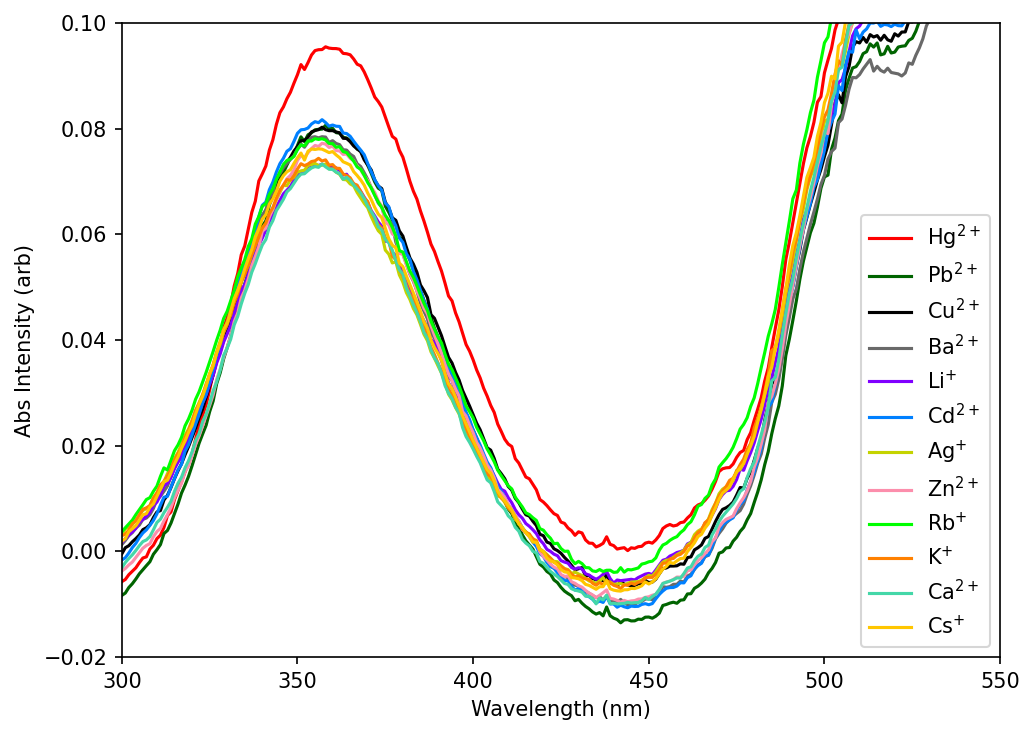

In [54]:
plt.figure(figsize=(7,5),dpi=150)
for i in range(0,len(Order)):
    plt.plot(x,y[i],color=ColorMap[Order[i]],label=Names[i])

pylab.ylim(-0.02,0.1)
pylab.xlim(300,550)
pylab.xlabel("Wavelength (nm)")
pylab.ylabel("Abs Intensity (arb)")
pylab.legend(loc='lower right')
plt.xticks([300,350,400,450,500,550],[300,350,400,450,500,550])
plt.tight_layout()
plt.savefig('Figs/Figure5.png',bbox_inches='tight')
plt.show()


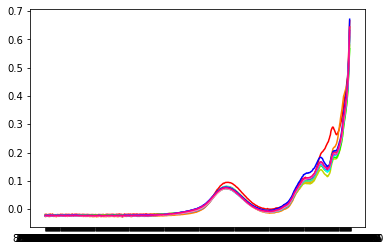

In [53]:
plt.plot(x,y1,color='#ff0000')
plt.plot(x,y2,color='#ff8000')
plt.plot(x,y3,color='#FFC600')
plt.plot(x,y4,color='#C4D300')
plt.plot(x,y5,color='#00ff00')
plt.plot(x,y6,color='#44D7A8')
plt.plot(x,y7,color='#00ffff')
plt.plot(x,y8,color='#0080ff')
plt.plot(x,y9,color='#0000ff')
plt.plot(x,y10,color='#8000ff')
plt.plot(x,y11,color='#FC8EAC')
plt.plot(x,y12,color='#ff0080')